# Strategy on SP500

In [18]:
from Utils import Strategy, Analytics
import matplotlib.pyplot as plt
import yfinance as yf
import copy

In [2]:
start_date = '2010-01-01'
end_date = '2024-01-01'
portfolio_value = 1000000
index = 'SP500'

In [8]:
filter_paths = ['annual_3_tier_filter.txt', 'biannual_2_tier_filter.txt', 'biannual_3_tier_filter.txt','monthly_filter.txt', 'quarterly_filter.txt', 'annual_filter.txt']
filter_paths = ['filters/' + path for path in filter_paths]
monthly_filter_ids = [0, 2, 3, 4, 5]
quarterly_filter_ids = [0, 1, 4, 5]
monthly_strategy = Strategy(portfolio_value, index, start_date, end_date, resampling = 'M', risk_free_rate = 0.02, trading_fees = 0.25)
quarterly_strategy = Strategy(portfolio_value, index, start_date, end_date, resampling = 'Q', risk_free_rate = 0.02, trading_fees = 0.25)

[*********************100%%**********************]  503 of 503 completed


2 Failed downloads:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-01 -> 2024-01-01)')



[*********************100%%**********************]  503 of 503 completed


2 Failed downloads:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-01 -> 2024-01-01)')


In [19]:
monthly_rebalanced_strategies = [copy.deepcopy(monthly_strategy) for i in monthly_filter_ids]
quarterly_rebalanced_strategies = [copy.deepcopy(quarterly_strategy) for i in quarterly_filter_ids]

In [22]:
for i, strategy in enumerate(monthly_rebalanced_strategies):
    strategy.initialise(filter_paths[monthly_filter_ids[i]])
for i, strategy in enumerate(quarterly_rebalanced_strategies):
    strategy.initialise(filter_paths[quarterly_filter_ids[i]])

In [23]:
for i, strategy in enumerate(monthly_rebalanced_strategies):
    print(strategy.filter_dict)
for i, strategy in enumerate(quarterly_rebalanced_strategies):
    print(strategy.filter_dict)

{12: 50, 6: 30, 3: 10}
{6: 50, 3: 30, 1: 10}
{1: 10}
{3: 10}
{12: 10}
{12: 50, 6: 30, 3: 10}
{6: 50, 3: 10}
{3: 10}
{12: 10}


In [24]:
monthly_rebalanced_analytics = [Analytics(strategy) for strategy in monthly_rebalanced_strategies]
quarterly_rebalanced_analytics = [Analytics(strategy) for strategy in quarterly_rebalanced_strategies]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


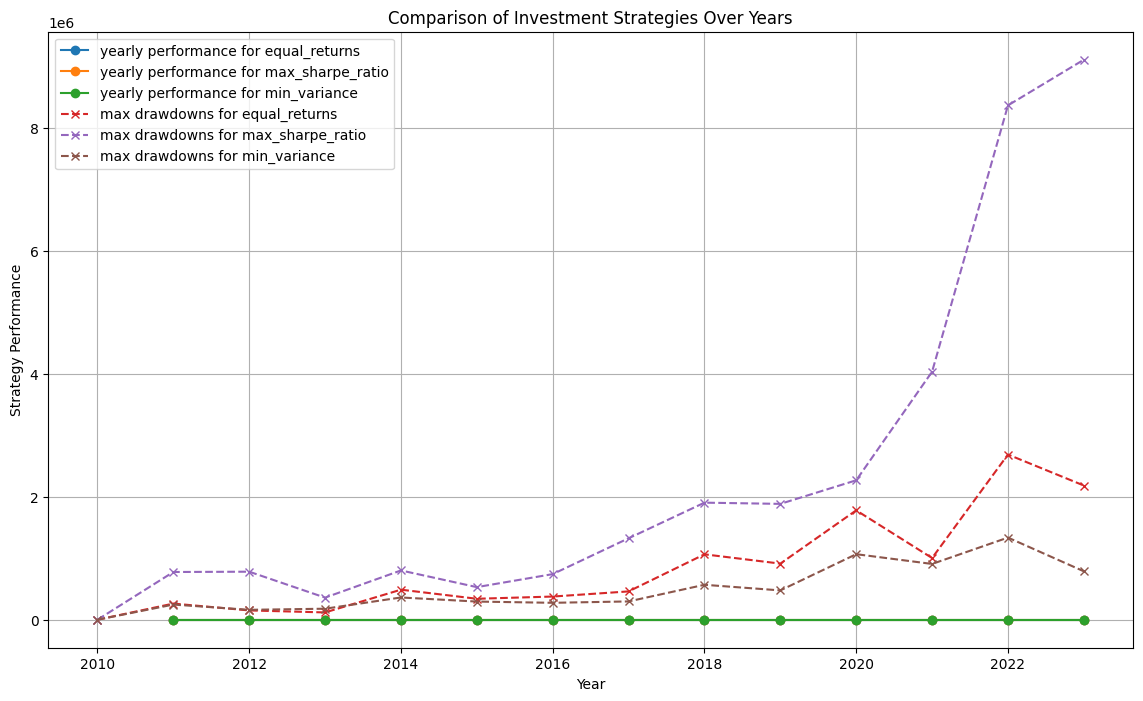

(      equal_returns  max_sharpe_ratio  min_variance
2011       0.107091         -0.418348      0.198291
2012       0.199689          0.682871      0.140764
2013       0.544173          0.654910      0.366113
2014       0.128201          0.198610      0.058726
2015       0.276871          0.601987      0.102214
2016       0.165472          0.501688      0.086902
2017       0.281433          0.139119      0.237441
2018      -0.046100         -0.142114     -0.058816
2019       0.269247          0.270984      0.154529
2020       0.199915          0.666296      0.283631
2021       0.258038          0.316080     -0.003776
2022      -0.004492         -0.028844      0.021546
2023       0.129260          0.300146      0.030563,      equal_returns max_sharpe_ratio min_variance
2010           0.0              0.0          0.0
2011     262462.99        775779.84    246507.38
2012     151164.37         780746.7    161018.11
2013     118612.07        359302.76    178963.35
2014     488218.43       

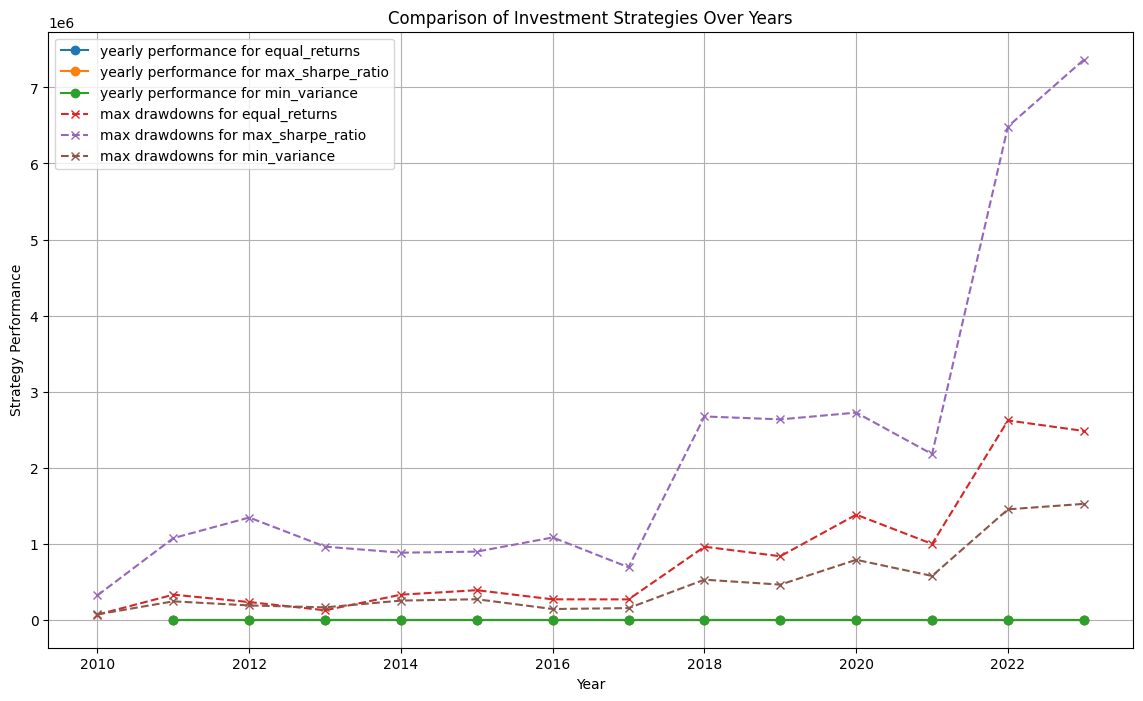

(      equal_returns  max_sharpe_ratio  min_variance
2011       0.141790          0.347975      0.054279
2012       0.023246         -0.297463      0.006083
2013       0.441778          0.366248      0.334096
2014       0.252777          0.350963      0.138642
2015       0.045579         -0.119150      0.078066
2016       0.311871          0.661679      0.204972
2017       0.145878          0.265032      0.126033
2018      -0.087605         -0.359185     -0.039330
2019       0.109864          0.476139      0.072576
2020       0.253281          0.588061      0.310704
2021       0.214985          0.146300      0.064371
2022      -0.063998         -0.326114     -0.127977
2023       0.033680          0.312527     -0.088934,      equal_returns max_sharpe_ratio min_variance
2010      67528.63        320643.64     70355.06
2011      329409.4       1073069.96    241744.63
2012     232108.31       1343813.07    187838.77
2013     124081.61        961092.03    162554.75
2014     329318.86       

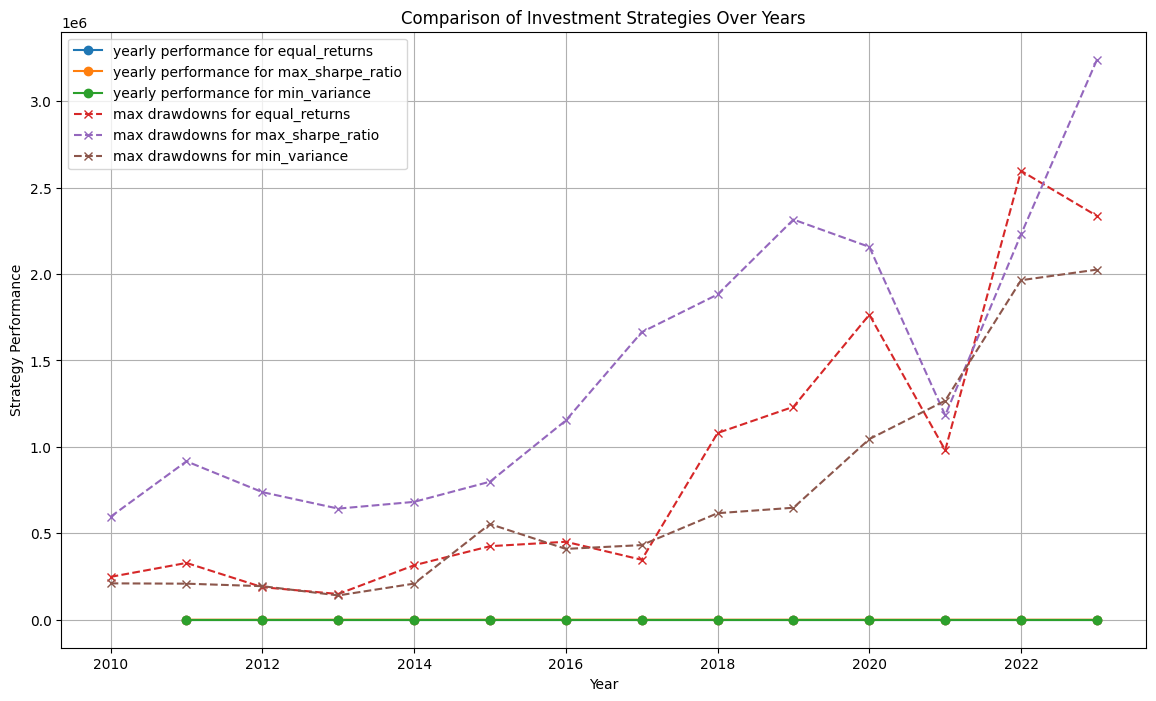

(      equal_returns  max_sharpe_ratio  min_variance
2011      -0.043074         -0.214745      0.097455
2012       0.163215          0.242438      0.160309
2013       0.529144          0.950257      0.519376
2014       0.191215          0.148664      0.192016
2015      -0.056408         -0.257151     -0.084955
2016       0.495621          0.464653      0.129618
2017       0.048745         -0.298410     -0.037545
2018      -0.019017         -0.034513      0.005077
2019       0.065913          0.007228      0.042740
2020       0.191301          1.468756      0.010867
2021       0.235983          0.351139     -0.037964
2022      -0.212512         -0.044410     -0.235033
2023       0.222746          1.868200      0.002022,      equal_returns max_sharpe_ratio min_variance
2010     247940.15        595978.71    210414.87
2011      328652.9        916583.51    208611.54
2012      188349.8        738241.09    194097.63
2013     148823.13        642929.59     140574.8
2014     314991.47       

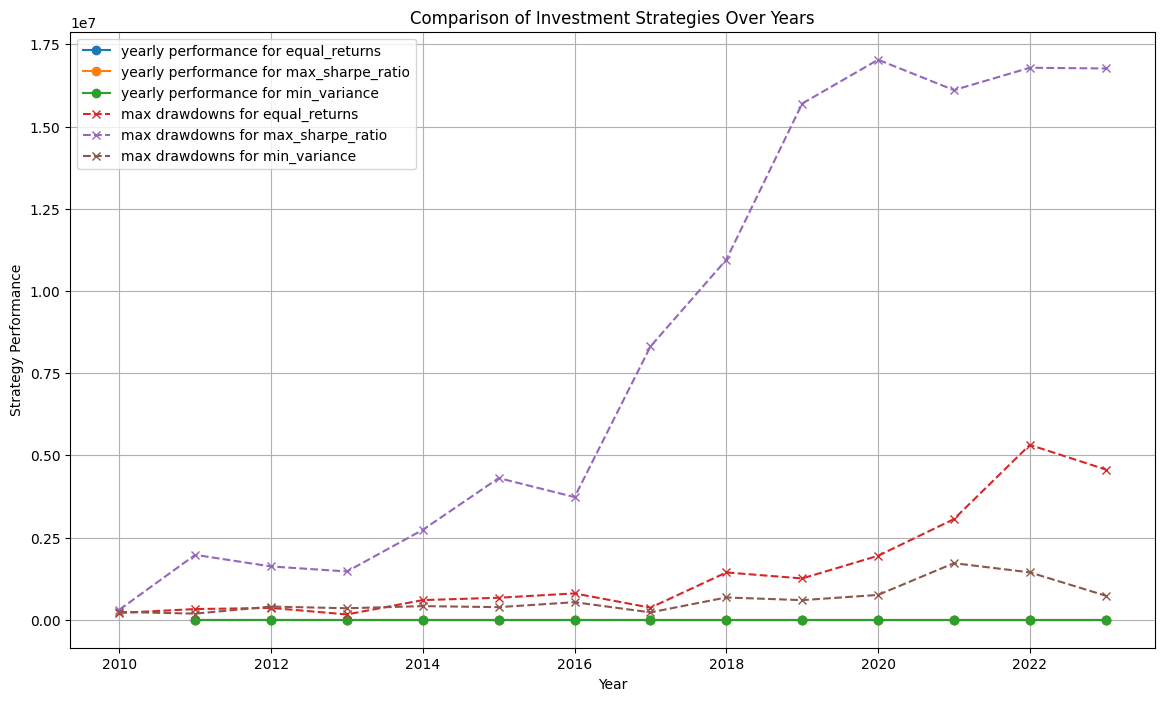

(      equal_returns  max_sharpe_ratio  min_variance
2011       0.132729         -0.179582      0.268638
2012       0.221389          1.618717     -0.011077
2013       0.389368          0.277099      0.230292
2014       0.280649          0.260085      0.250967
2015      -0.012396         -0.073794     -0.002839
2016       0.267728          0.906710      0.003917
2017       0.283705          0.392962      0.304554
2018       0.004872         -0.322164     -0.016238
2019       0.270836         -0.264344      0.179411
2020       0.485428          1.012199      0.307004
2021       0.445265          0.436225      0.256517
2022      -0.135984         -0.130996     -0.039788
2023      -0.012164          0.167330      0.021993,      equal_returns max_sharpe_ratio min_variance
2010     207362.47        304591.71    237238.24
2011     324073.38        1973501.4    185556.41
2012     358240.08       1619946.07    400219.15
2013      161192.2       1467808.03    348607.74
2014     597026.73       

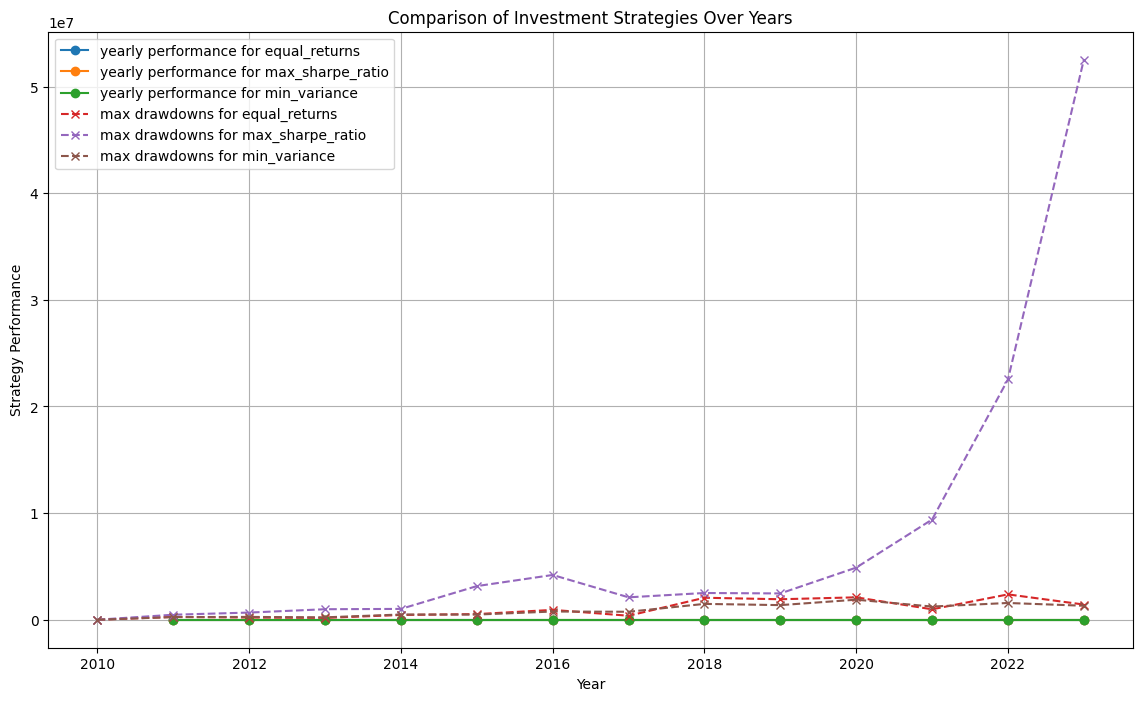

(      equal_returns  max_sharpe_ratio  min_variance
2011       0.163109         -0.142143      0.443493
2012       0.306209          1.848390      0.144765
2013       0.422544          0.095481      0.372775
2014       0.343557          1.273378      0.278715
2015       0.046480         -0.372037      0.072264
2016       0.088258          0.345309     -0.134967
2017       0.284729          0.163591      0.269219
2018      -0.152686          0.095616     -0.143912
2019       0.410201          0.743491      0.270680
2020       0.250995          0.421565     -0.080240
2021       0.153657          1.950563      0.040010
2022       0.055066          1.214801     -0.146704
2023       0.214809         -0.100393      0.156341,      equal_returns max_sharpe_ratio min_variance
2010           0.0              0.0          0.0
2011     263964.33        469041.96    247066.15
2012     206382.86        670815.49    263269.73
2013     173598.87         984478.9    223119.38
2014     444012.21       

In [30]:
for an in monthly_rebalanced_analytics:
    print(an.yearly_metrics(plot = True))

In [ ]:
for an in quarterly_rebalanced_analytics:
    an.get_financial_metrics()
    